**Goal**: Recognize handwritten digits with a Decision Tree, RandomForestClassifier  

---

and KNeighborsClassifier with MNIST


**General Steps:**
+ Install packages
+ Loading the data from MNIST.
+ Define the classifier
+ Train the model.
+ Display the model performance as it trains.


**Install packages**

In [ ]:
pip install Pillow scikit-learn python-mnist sklearn


**Load  Libraries**
and import files : train.csv and test.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1138,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1139,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1140,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**MNIST with Decision Trees**


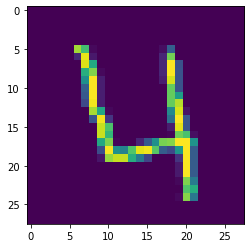

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("train.csv")
df.head()
#visualising our dataset using matplotlib
image0 = df.iloc[3,1:]
image0                                                
plt.imshow(np.array(image0).reshape(28,28))
x = df.iloc[:,1:]
y = df.iloc[:,0]
from sklearn.model_selection import train_test_split
xtrain , xtest ,ytrain, ytest = train_test_split(x,y,test_size =0.2,shuffle = False,random_state =7)


In [ ]:
from sklearn.tree import DecisionTreeClassifier 
dtree = DecisionTreeClassifier()
dtree.fit(xtrain , ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#elimine the NAN of input########""
xtest=xtest.fillna(xtest.mean())
########################
ypred = dtree.predict(xtest)
ypred
from sklearn.metrics import confusion_matrix
cmdtree = confusion_matrix(ytest,ypred)
cmdtree ,dtree.score(xtest , ytest)

(array([[10,  0,  0,  2,  0,  3,  3,  0,  0,  0],
        [ 0, 16,  0,  0,  0,  0,  0,  0,  1,  0],
        [ 0,  0, 22,  3,  0,  0,  0,  1,  4,  2],
        [ 0,  1,  0,  6,  0,  5,  0,  2,  1,  3],
        [ 1,  0,  1,  0, 19,  0,  0,  1,  0,  2],
        [ 0,  1,  1,  2,  1, 11,  3,  1,  1,  1],
        [ 0,  1,  1,  0,  2,  1, 13,  0,  2,  2],
        [ 0,  0,  1,  0,  3,  3,  1, 15,  2,  3],
        [ 0,  1,  2,  0,  1,  3,  1,  1, 15,  1],
        [ 0,  1,  0,  0,  1,  1,  0,  2,  0, 18]]), 0.6331877729257642)

**MNIST with RandomForestClassifier**

Random forests are an ensemble learning method that can be used for classification. It works by using a multitude of decision trees and it selects the class that is the most often predicted by the trees.

A decision tree contains at each vertex a "question" and each descending edge is an "answer" to that question. The leaves of the tree are the possible outcomes. A decision tree can be built automatically from a training set.

Each tree of the forest is created using a random sample of the original training set, and by considering only a subset of the features (typically the square root of the number of features). The number of trees is controlled by cross-validation.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier()
rforest.fit(xtrain , ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
ypred = rforest.predict(xtest)
ypred

array([2, 9, 8, 3, 4, 2, 0, 4, 4, 6, 5, 0, 1, 2, 2, 3, 4, 5, 7, 8, 0, 6,
       8, 9, 1, 7, 7, 2, 6, 3, 9, 9, 1, 0, 9, 2, 5, 4, 4, 9, 2, 6, 7, 2,
       8, 3, 3, 3, 7, 0, 4, 7, 0, 7, 7, 8, 1, 7, 3, 7, 8, 0, 1, 0, 2, 9,
       7, 6, 2, 2, 6, 9, 0, 6, 8, 1, 9, 6, 3, 5, 0, 0, 2, 5, 9, 6, 4, 1,
       5, 1, 7, 9, 8, 9, 5, 7, 4, 7, 2, 2, 1, 9, 3, 8, 6, 2, 8, 7, 6, 7,
       8, 1, 8, 8, 1, 9, 0, 9, 4, 6, 6, 8, 2, 3, 5, 4, 5, 4, 1, 3, 7, 1,
       5, 0, 0, 8, 5, 9, 7, 6, 8, 2, 8, 4, 2, 3, 6, 4, 8, 0, 2, 4, 7, 3,
       4, 4, 5, 4, 8, 3, 1, 5, 1, 0, 2, 2, 2, 9, 5, 9, 6, 0, 9, 4, 1, 7,
       2, 2, 0, 7, 0, 6, 8, 0, 9, 7, 4, 2, 9, 3, 2, 5, 7, 1, 9, 9, 9, 9,
       4, 5, 0, 7, 6, 2, 6, 3, 1, 8, 5, 3, 3, 4, 7, 3, 2, 7, 7, 5, 5, 6,
       9, 8, 0, 8, 1, 4, 9, 2, 8])

0.8908296943231441

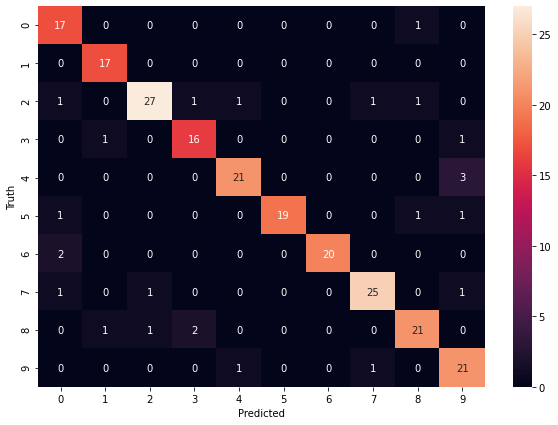

In [ ]:
cmrforest = confusion_matrix(ytest , ypred)
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cmrforest ,annot=True , fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')
rforest.score(xtest,ytest)

Predicted 7


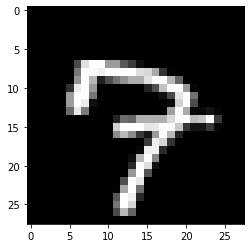

In [ ]:
#import required libraries
import pandas as pd
test_file = pd.read_csv('test.csv')
x_test=test_file
#elimine the NAN of input########""
x_test=x_test.fillna(x_test.mean())
########################
#predict test data
prediction_test = rforest.predict(x_test)
index=5
print("Predicted " + str(prediction_test[index]))
plt.imshow(x_test.iloc[index].values.reshape((28,28)),cmap='gray')


**Mnist with KNeighborsClassifier**

The k-nearest neighbors algorithm is one of the simplest algorithm for classification. Let's represent the training data as a set of points in the feature space (e.g. for objects with 2 features, they are points of the 2D plan). Classification is based on the K closest points of the training set to the object we wish to classify. The object is classified by a majority vote of its k-nearest neighbors.

The training phase of the K-Nearest Neighbors algorithm is fast, however the classification phase may be slow due to computation of K distances.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(xtrain ,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
ypred = knn.predict(xtest)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ypred,ytest)

0.9053549190535491

(array([3]),
 0.012804985046386719,
 <matplotlib.image.AxesImage at 0x7f793d792e80>)

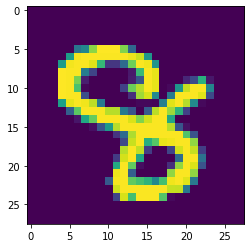

In [ ]:
import time
start = time.time()
ypred1 = knn.predict(xtest.iloc[0,:].values.reshape(1,784))
end = time.time()
imag = xtest.iloc[8,:]
ypred1, end-start,plt.imshow(np.array(imag).reshape(28,28))